In [107]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()


X = iris.data
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 데이터의 시각화

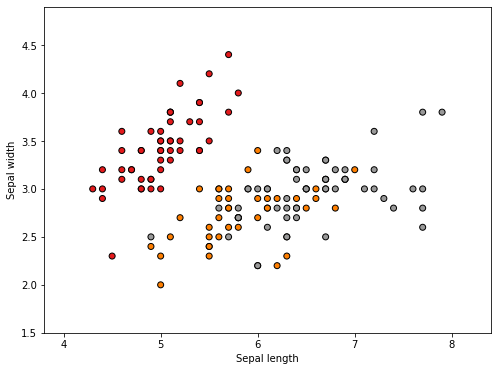

In [108]:

# here we only select sepal length and width (select first 2 columns)
X_visual = iris.data[:, :2]  
y_visual = iris.target

# visualization을 위하여 lim 설정
x_min, x_max = X_visual[:, 0].min() - .5, X_visual[:, 0].max() + .5
y_min, y_max = X_visual[:, 1].min() - .5, X_visual[:, 1].max() + .5

plt.figure(figsize=(8, 6))

# Plot the training points
plt.scatter(X_visual[:, 0], X_visual[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

### 데이터의  분할

In [109]:
# (80:20)으로 분할한다. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

print(X_train.shape)
print(X_test.shape)


(120, 4)
(30, 4)


### KNeighborsClassifier /Perceptron 모델 생성 및 학습

In [120]:
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
# KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=6)

### test 데이터로 예측

In [121]:
y_pred = model.predict(X_test)

from sklearn import metrics
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)




0.9666666666666667


### 새로운 데이터의 예측 

In [112]:
x_new = [[3,4,5,2],
         [5,4,2,2]]

y_predict = model.predict(x_new)
classes = {0:'setosa',1:'versicolor',2:'virginica'}


print(classes[y_predict[0]])
print(classes[y_predict[1]])


versicolor
setosa


### 적절한 n_neighbor 찾기

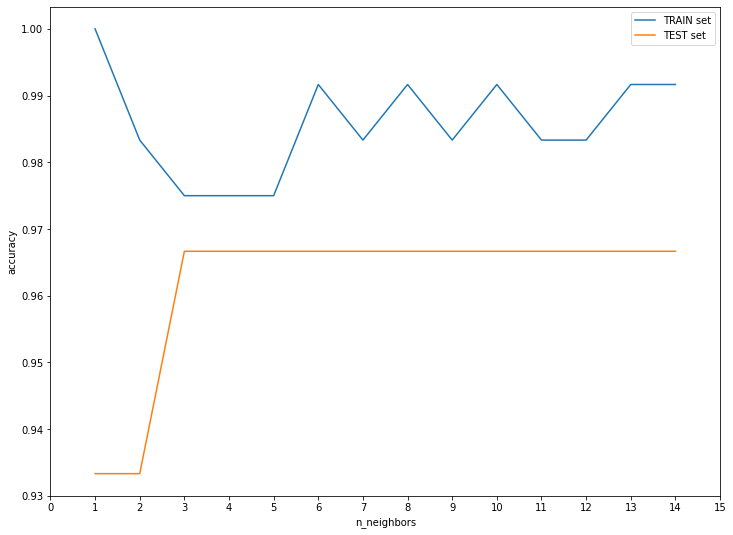

In [113]:
import numpy as np

train_acc = []
test_acc = []

for n in range(1,15):
    clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=n)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append((prediction==y_test).mean())
plt.figure(figsize=(12, 9))
plt.plot(range(1, 15), train_acc, label='TRAIN set')
plt.plot(range(1, 15), test_acc, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1))
plt.legend()